In [49]:
import pandas as pd
import numpy as np 
import seaborn as sns
import math
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")


In [50]:
df = pd.read_csv("ai_job_dataset.csv")
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [51]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [53]:
df.shape

(15000, 19)

In [54]:
df.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

In [55]:
#No Null Value Present

df.isnull().sum().sum()

np.int64(0)

In [56]:
# No Duplicate Value As well
df.duplicated().sum()

np.int64(0)

In [57]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [58]:
#checking for unique Job Id  

df.duplicated("job_id").sum()

np.int64(0)

In [59]:
df['salary_currency'].unique()


array(['USD', 'EUR', 'GBP'], dtype=object)

In [60]:
df['salary_currency'].value_counts()


salary_currency
USD    11957
EUR     2314
GBP      729
Name: count, dtype: int64

In [61]:
# 1. Define exchange rates (these are approximate — for learning purposes)
currency_to_usd = {
    'USD': 1.00,
    'EUR': 1.08,
    'GBP': 1.27,
    
}
#Need_To_Standardise_the_salary_in_One_Currency_There_Fore_Converted_them_All_in_USD
# 2. Convert to USD
df['salary_in_usd'] = df.apply(
    lambda row: row['salary_usd'] * currency_to_usd.get(row['salary_currency'], 1.0),
    axis=1
)


In [62]:
df[['salary_usd', 'salary_currency', 'salary_in_usd']].sample(10)


,salary_usd,salary_currency,salary_in_usd
1073,85510,USD,85510.00
49,124871,USD,124871.00
6438,74342,USD,74342.00
1498,87076,USD,87076.00
7034,108388,USD,108388.00
2328,74067,USD,74067.00
203,59056,USD,59056.00
11709,80555,USD,80555.00
8945,138852,EUR,149960.16
8396,225275,USD,225275.00


<Axes: xlabel='years_experience', ylabel='salary_in_usd'>

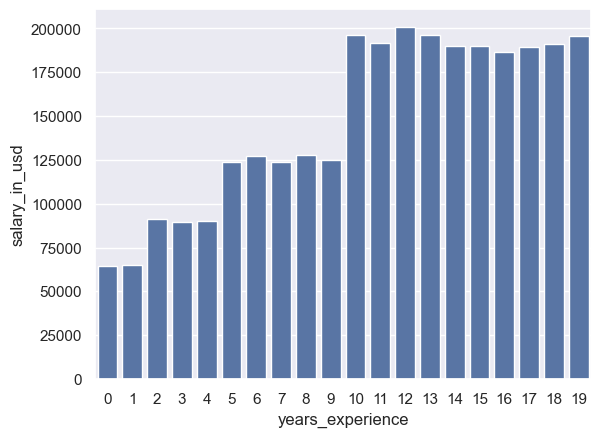

In [63]:
sns.barplot(x='years_experience', y='salary_in_usd', data=df, estimator='mean', errorbar=None)


C:\Users\SauravPayal\AppData\Local\Temp\ipykernel_7752\4011757806.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette='viridis')


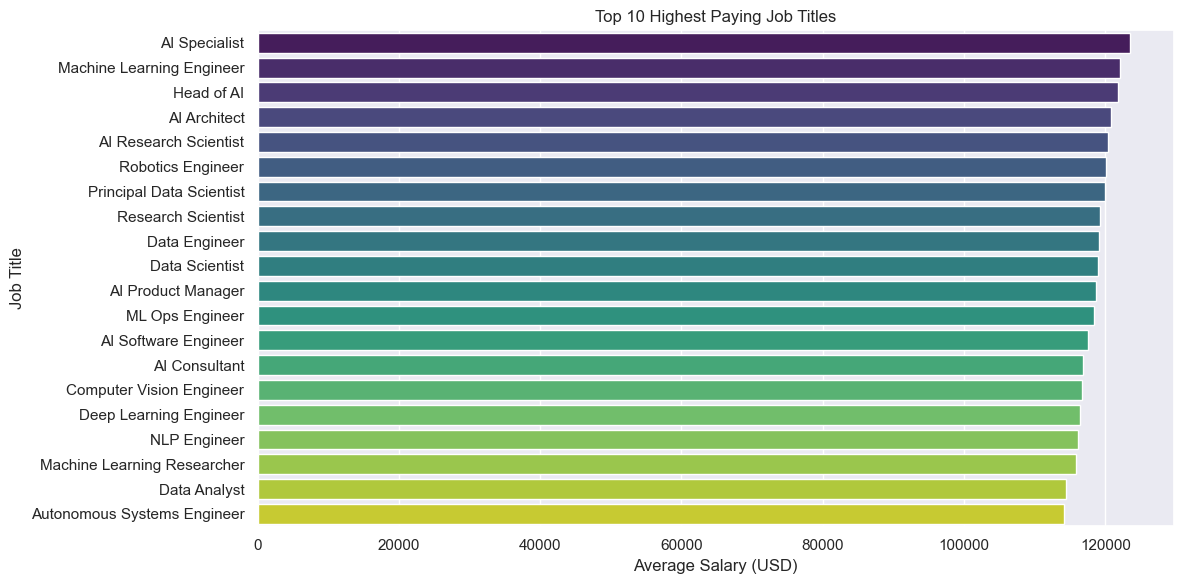

In [64]:
# Get top 10 highest paying job titles
top_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(30)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette='viridis')
plt.xlabel("Average Salary (USD)")
plt.ylabel("Job Title")
plt.title("Top 10 Highest Paying Job Titles")
plt.tight_layout()
plt.show()

C:\Users\SauravPayal\AppData\Local\Temp\ipykernel_7752\3551782806.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')


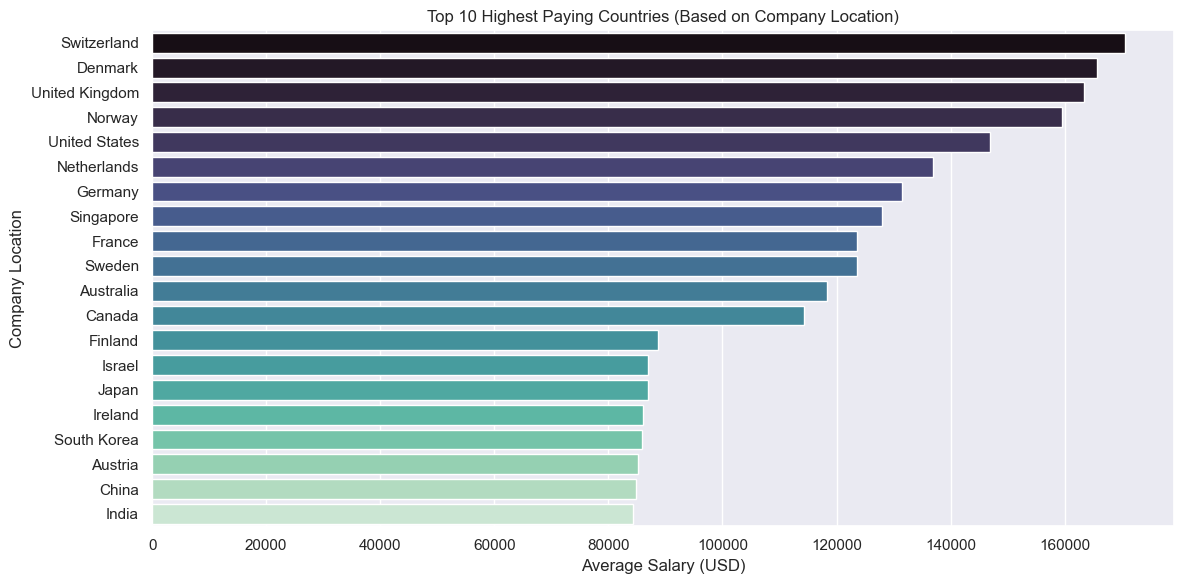

In [65]:
# Top countries by average salary
top_countries = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')
plt.xlabel("Average Salary (USD)")
plt.ylabel("Company Location")
plt.title("Top 10 Highest Paying Countries (Based on Company Location)")
plt.tight_layout()
plt.show()


Salary VS Education


C:\Users\SauravPayal\AppData\Local\Temp\ipykernel_7752\3824164012.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='education_required', y='salary_usd', data=df, estimator='mean', errorbar=None, palette='Set2')


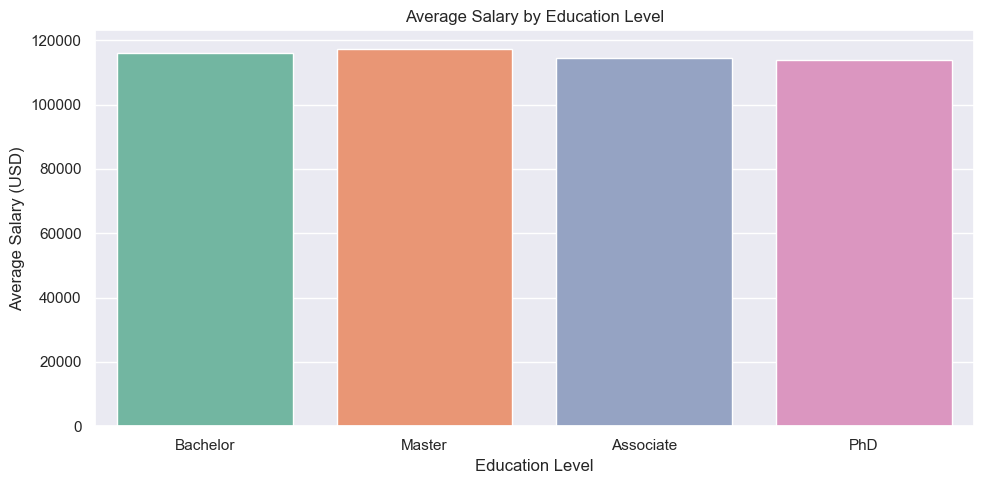

In [66]:
plt.figure(figsize=(10, 5))
sns.barplot(x='education_required', y='salary_usd', data=df, estimator='mean', errorbar=None, palette='Set2')
plt.title("Average Salary by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Salary (USD)")
plt.tight_layout()
plt.show()

#I guess Education doesnt matter--Lol--Prpbably-Dataset is lacking

C:\Users\SauravPayal\AppData\Local\Temp\ipykernel_7752\3848925500.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_industries.values, y=top_industries.index, palette='cubehelix')


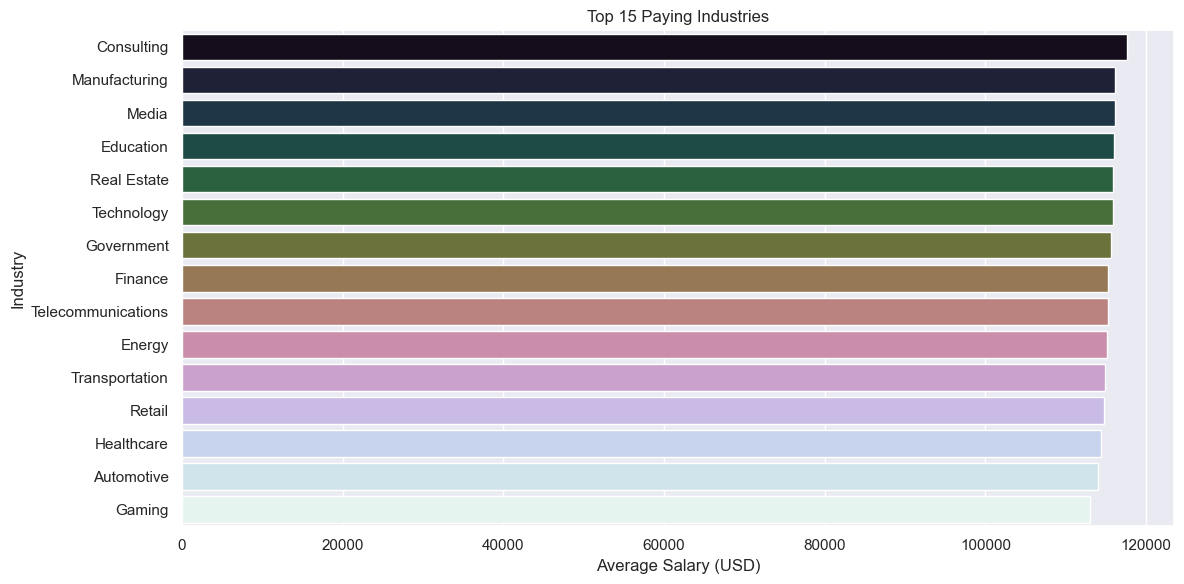

In [67]:
# salary vs Industry

top_industries = df.groupby('industry')['salary_usd'].mean().sort_values(ascending=False).head(30)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_industries.values, y=top_industries.index, palette='cubehelix')
plt.title("Top 15 Paying Industries")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()




#Weird data---huh

C:\Users\SauravPayal\AppData\Local\Temp\ipykernel_7752\2539758113.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='company_size', y='salary_usd', data=df, order=['S', 'M', 'L'], palette='pastel')


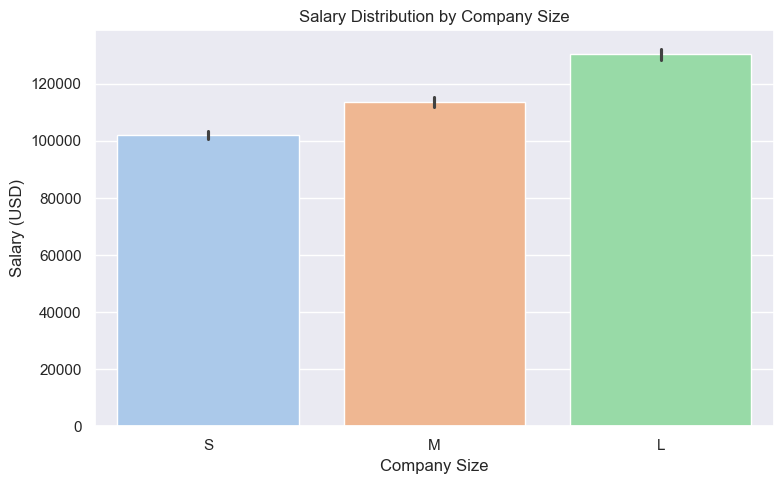

In [68]:
#Salary Distribution By Company Size
plt.figure(figsize=(8, 5))
sns.barplot(x='company_size', y='salary_usd', data=df, order=['S', 'M', 'L'], palette='pastel')
plt.title("Salary Distribution by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Salary (USD)")
plt.tight_layout()
plt.show()


C:\Users\SauravPayal\AppData\Local\Temp\ipykernel_7752\1463241854.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako', legend=False)


Text(0.5, 1.0, 'Job Postings Over Time')

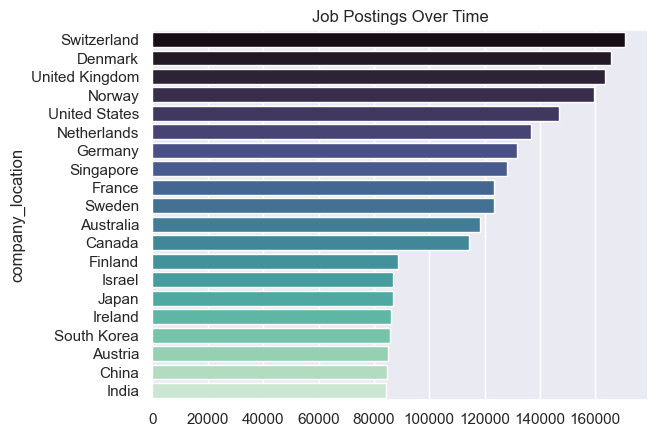

In [69]:
# Job Posting Over time

df['posting_date'] = pd.to_datetime(df['posting_date'])
sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako', legend=False)

plt.title("Job Postings Over Time")

# So Swizterland has the highest paying jobs and Most job posting in this data set, I guess i should think about moving to switzerland

Text(0.5, 1.0, 'Top 20 In-Demand Skills')

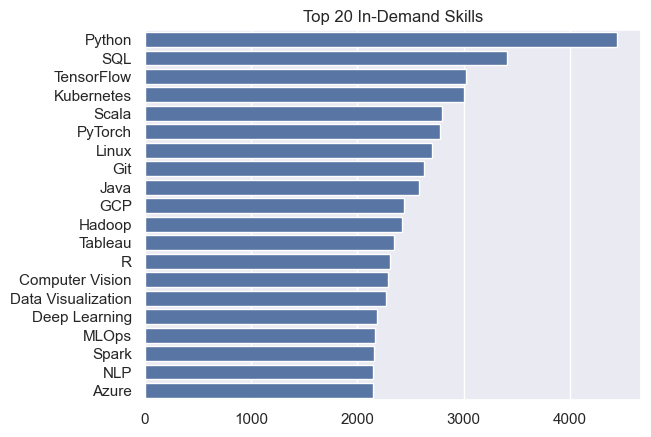

In [70]:
# Most Common Skill required

from collections import Counter
skill_counts = Counter([skill.strip() for skills in df['required_skills'].dropna() for skill in skills.split(',')])
top_skills = dict(skill_counts.most_common(20))
sns.barplot(x=list(top_skills.values()), y=list(top_skills.keys()))
plt.title("Top 20 In-Demand Skills")


#Python For the Win-----Yepiee


Text(0.5, 1.0, 'Correlation Between Numerical Features')

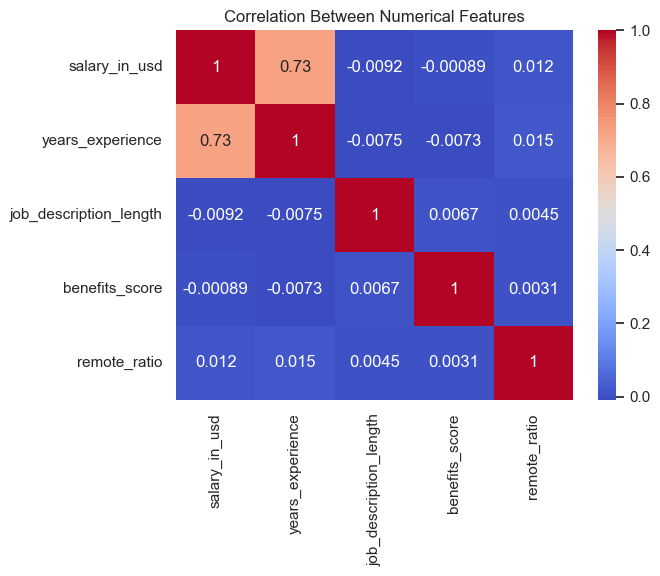

In [71]:
# Heatmap of correlation

numerical_cols = ['salary_in_usd', 'years_experience', 'job_description_length', 'benefits_score', 'remote_ratio']
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")


Text(0.5, 1.0, 'Top Countries by Number of Job Listings')

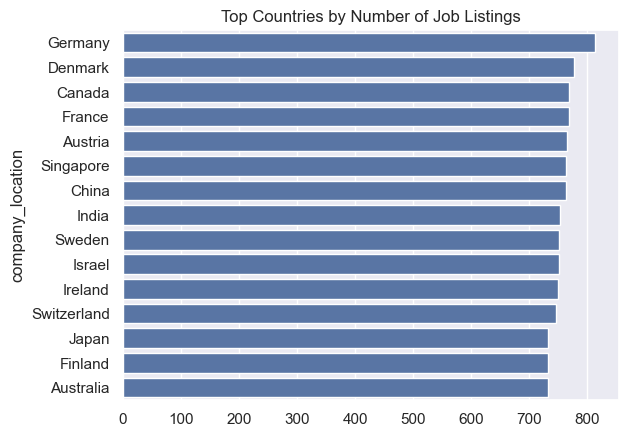

In [72]:
# Number of Opening per country
job_counts = df['company_location'].value_counts().head(15)
sns.barplot(x=job_counts.values, y=job_counts.index)
plt.title("Top Countries by Number of Job Listings")


#Germany has the Most number of opening

Text(0.5, 1.0, 'Top Countries Offering Fully Remote Jobs')

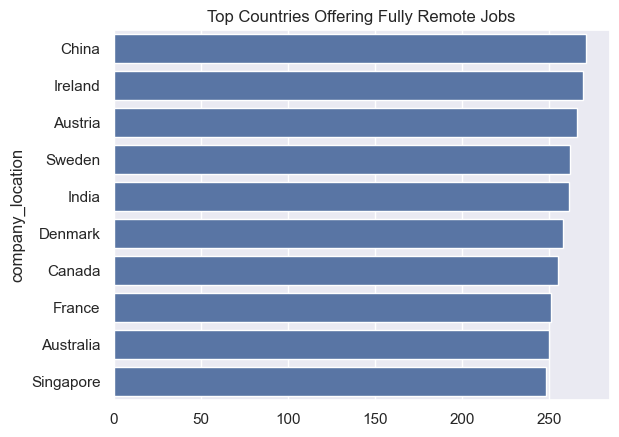

In [73]:
# remote Jobs by Country

remote_jobs = df[df['remote_ratio'] == 100]['company_location'].value_counts().head(10)
sns.barplot(x=remote_jobs.values, y=remote_jobs.index)
plt.title("Top Countries Offering Fully Remote Jobs")


Text(0.5, 1.0, 'Salary by Employment Type')

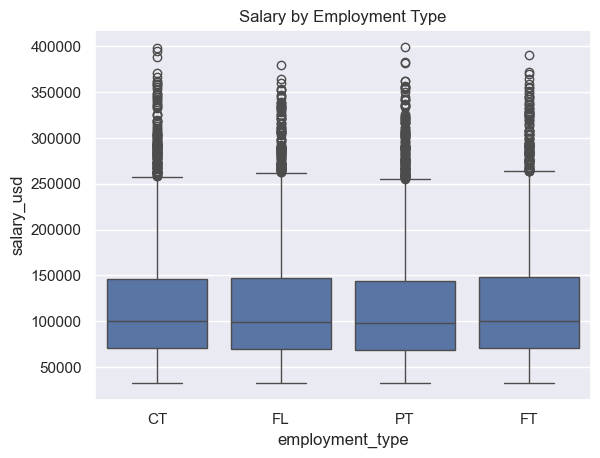

In [74]:
# Salary by Employment Type

sns.boxplot(x='employment_type', y='salary_usd', data=df)
plt.title("Salary by Employment Type")


C:\Users\SauravPayal\AppData\Local\Temp\ipykernel_7752\1151623701.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='remote_ratio', y='salary_usd', data=df, palette='coolwarm')


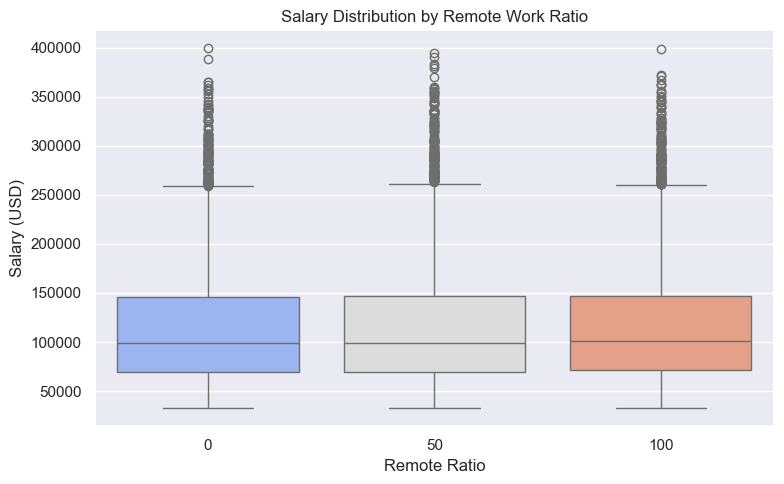

In [75]:
# Sala ry Distribution by Company Size


plt.figure(figsize=(8, 5))
sns.boxplot(x='remote_ratio', y='salary_usd', data=df, palette='coolwarm')
plt.title("Salary Distribution by Remote Work Ratio")
plt.xlabel("Remote Ratio")
plt.ylabel("Salary (USD)")
plt.tight_layout()
plt.show()


C:\Users\SauravPayal\AppData\Local\Temp\ipykernel_7752\121819080.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.set_index('posting_date').resample('M')['salary_usd'].mean()


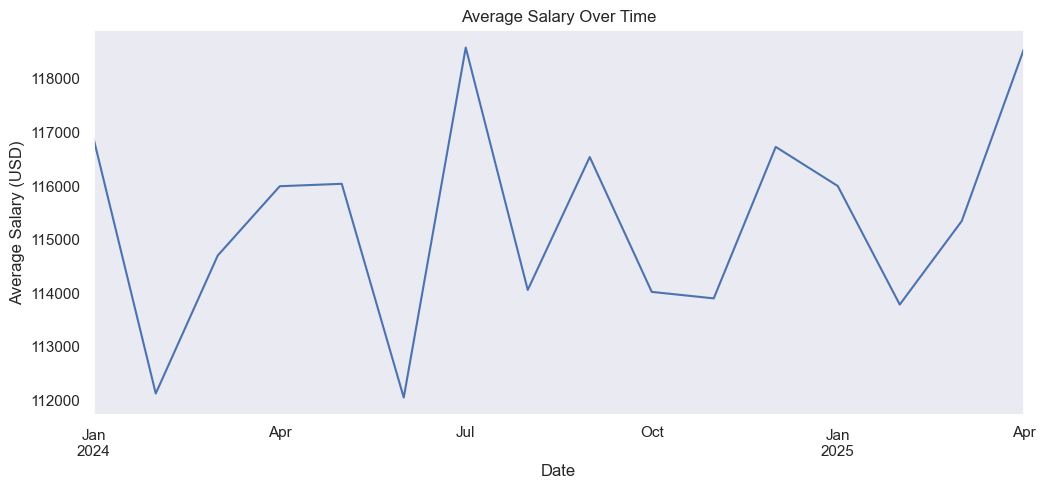

In [76]:
# Salary Trends over time:

df['posting_date'] = pd.to_datetime(df['posting_date'])
monthly_avg = df.set_index('posting_date').resample('M')['salary_usd'].mean()

plt.figure(figsize=(12, 5))
monthly_avg.plot()
plt.title("Average Salary Over Time")
plt.xlabel("Date")
plt.ylabel("Average Salary (USD)")
plt.grid()
plt.show()


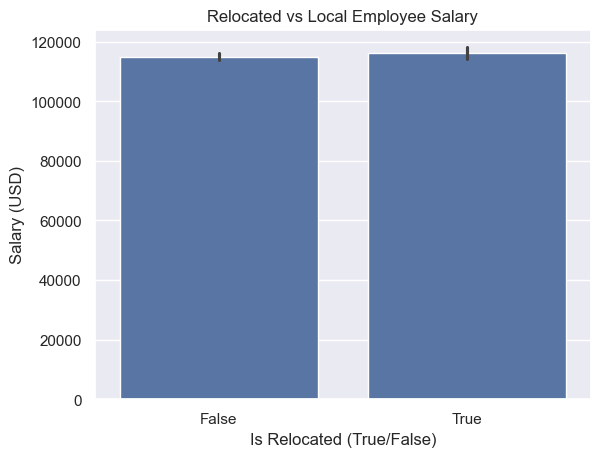

In [77]:
# Relocation vs Local Work: Salary Difference

df['is_relocated'] = df['company_location'] != df['employee_residence']

sns.barplot(x='is_relocated', y='salary_usd', data=df)
plt.title("Relocated vs Local Employee Salary")
plt.xlabel("Is Relocated (True/False)")
plt.ylabel("Salary (USD)")
plt.show()


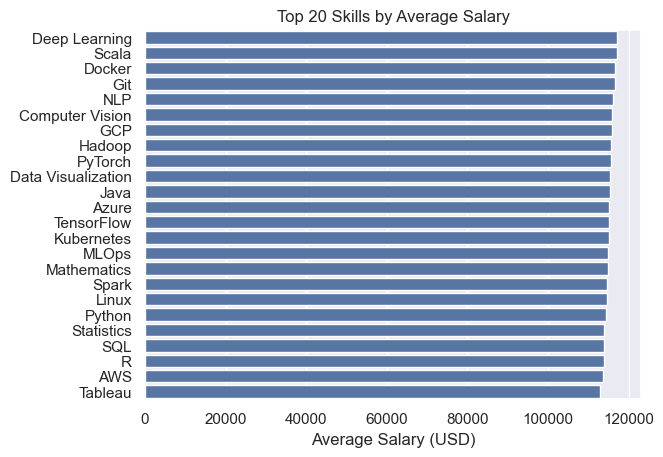

In [78]:
# Skill Importance; Salary per skill

from collections import defaultdict

skill_salaries = defaultdict(list)

for _, row in df[['required_skills', 'salary_usd']].dropna().iterrows():
    for skill in row['required_skills'].split(','):
        skill_salaries[skill.strip()].append(row['salary_usd'])

skill_avg = {skill: sum(salaries)/len(salaries) for skill, salaries in skill_salaries.items()}
top_skill_salaries = dict(sorted(skill_avg.items(), key=lambda x: x[1], reverse=True)[:40])

sns.barplot(x=list(top_skill_salaries.values()), y=list(top_skill_salaries.keys()))
plt.title("Top 20 Skills by Average Salary")
plt.xlabel("Average Salary (USD)")
plt.show()


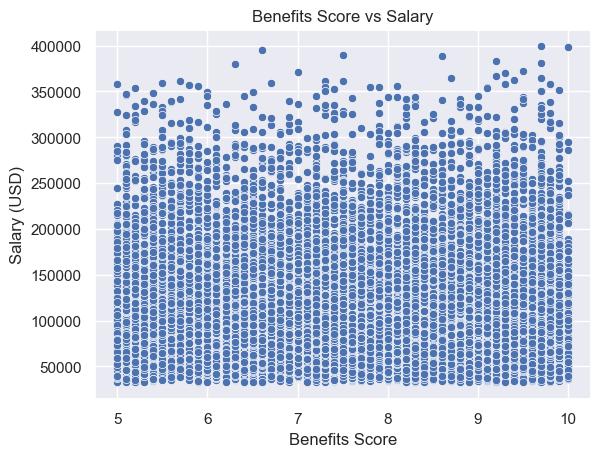

In [79]:
# high Paying Job but low demand
sns.scatterplot(x='benefits_score', y='salary_usd', data=df)
plt.title("Benefits Score vs Salary")
plt.xlabel("Benefits Score")
plt.ylabel("Salary (USD)")
plt.show()



 Clustering: Grouping Job Roles Based on Skills & Salary 
 Using unsupervised ML to group similar jobs:

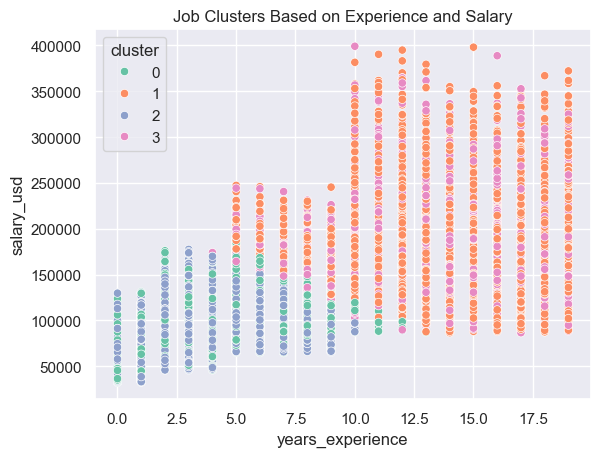

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Example: Cluster by years_experience, remote_ratio, salary
features = df[['years_experience', 'remote_ratio', 'salary_usd']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x='years_experience', y='salary_usd', hue=df['cluster'], palette='Set2', data=features)
plt.title("Job Clusters Based on Experience and Salary")
plt.show()


📈 Linear Regression: Predict Salary from Experience, Education, Remote Ratio
Basic predictive modeling

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model_df = df[['salary_usd', 'years_experience', 'remote_ratio', 'benefits_score']].dropna()
X = model_df.drop(columns='salary_usd')
y = model_df['salary_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("R-squared score:", lr.score(X_test, y_test))


R-squared score: 0.5554325910540399


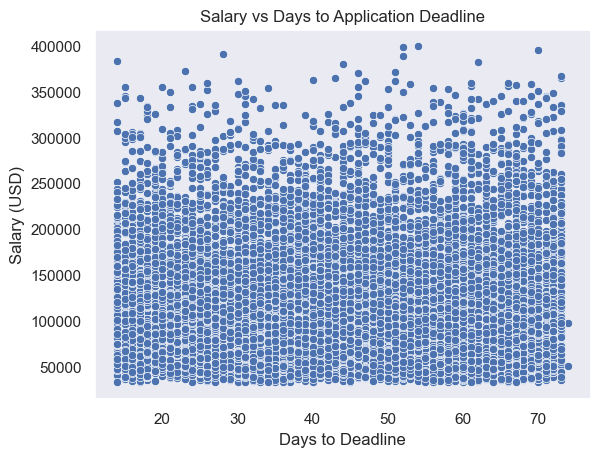

Correlation: 0.01


In [82]:
#Question: Are jobs with shorter application deadlines offering higher salaries?

# Ensure datetime format
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['application_deadline'] = pd.to_datetime(df['application_deadline'])

# Calculate time delta in days
df['days_to_deadline'] = (df['application_deadline'] - df['posting_date']).dt.days

# Drop negative or null values
df_deadline = df[(df['days_to_deadline'] > 0) & (df['salary_usd'].notna())]

# Scatter plot
sns.scatterplot(x='days_to_deadline', y='salary_usd', data=df_deadline)
plt.title("Salary vs Days to Application Deadline")
plt.xlabel("Days to Deadline")
plt.ylabel("Salary (USD)")
plt.grid()
plt.show()

# Correlation
corr = df_deadline[['days_to_deadline', 'salary_usd']].corr().iloc[0, 1]
print("Correlation:", round(corr, 2))



In [83]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Sample setup: Assume df is already loaded and has a 'required_skills' column
# df = pd.read_csv('your_file.csv')  # Uncomment and modify if loading from file

# Step 1: Clean and Prepare Skills Data
df_skills = df[['required_skills']].dropna()
df_skills['required_skills'] = df_skills['required_skills'].str.lower().str.replace(' ', '')

# Step 2: TF-IDF Vectorization (split skills by comma)
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(','))
X_tfidf = vectorizer.fit_transform(df_skills['required_skills'])

# Step 3: KMeans Clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_skills['cluster'] = kmeans.fit_predict(X_tfidf)

# Step 4: Display Top 10 Skills Per Cluster
for cluster in range(n_clusters):
    mask = (df_skills['cluster'] == cluster).values
    cluster_words = X_tfidf[mask].sum(axis=0)
    words = [(word, cluster_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    top_words = sorted(words, key=lambda x: x[1], reverse=True)[:10]
    print(f"🔹 Cluster {cluster} - Top Skills:", [w[0] for w in top_words])


🔹 Cluster 0 - Top Skills: ['python', 'tensorflow', 'sql', 'kubernetes', 'pytorch', 'scala', 'git', 'java', 'nlp', 'mlops']
🔹 Cluster 1 - Top Skills: ['gcp', 'datavisualization', 'python', 'sql', 'scala', 'kubernetes', 'tensorflow', 'pytorch', 'git', 'java']
🔹 Cluster 2 - Top Skills: ['r', 'sql', 'java', 'python', 'kubernetes', 'git', 'deeplearning', 'linux', 'scala', 'hadoop']
🔹 Cluster 3 - Top Skills: ['linux', 'tableau', 'hadoop', 'python', 'sql', 'tensorflow', 'kubernetes', 'pytorch', 'scala', 'git']
🔹 Cluster 4 - Top Skills: ['computervision', 'python', 'kubernetes', 'sql', 'tensorflow', 'linux', 'pytorch', 'scala', 'git', 'java']


c:\Users\SauravPayal\project\Learning\jobs\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [84]:
#3. Predict Industry or Title from Skill Set (ML Classification)
#We'll show predicting industry from required_skills using TF-IDF + Logistic Regression.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df_model = df[['required_skills', 'industry']].dropna()
X = vectorizer.fit_transform(df_model['required_skills'].str.lower())
y = df_model['industry']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Classification Report:
                     precision    recall  f1-score   support

        Automotive       0.06      0.08      0.07       219
        Consulting       0.06      0.07      0.07       206
         Education       0.08      0.09      0.08       187
            Energy       0.09      0.05      0.07       187
           Finance       0.08      0.05      0.06       199
            Gaming       0.12      0.11      0.12       186
        Government       0.06      0.06      0.06       195
        Healthcare       0.09      0.10      0.10       210
     Manufacturing       0.08      0.04      0.06       206
             Media       0.06      0.04      0.05       213
       Real Estate       0.08      0.06      0.07       188
            Retail       0.07      0.08      0.07       211
        Technology       0.07      0.05      0.06       212
Telecommunications       0.05      0.09      0.07       179
    Transportation       0.08      0.11      0.09       202

          accu

c:\Users\SauravPayal\project\Learning\jobs\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
